# <center> INSURANCE

# DEFINE PROBLEMS

# GOALS

#  **Input variables**
**1. age:** (numeric)

**2. job :** type of job (categorical: ‘admin.’,’blue collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)

**3. marital :** marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)

**4. education (categorical:** ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’professional.course’,’university.degree’,’unknown’)

**5. default:** has credit in default? (categorical: ‘no’,’yes’,’unknown’)

**6. housing:** has housing loan? (categorical: ‘no’,’yes’,’unknown’)

**7. loan:** has personal loan? (categorical: ‘no’,’yes’,’unknown’)

**8. contact:** contact communication type (categorical: ‘cellular’,’telephone’)

**9. month:** last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

**10. day** : last contact day

**11. duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**12. campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

**13. pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**14. previous:** number of contacts performed before this campaign and for this client (numeric)

**15. poutcome:** outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
social and economic context attributes


# LIBRARY PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

from sklearn import set_config
set_config(print_changed_only=False)


In [2]:
df = pd.read_csv('Insurance.csv')

# DATA INFORMATION

In [3]:
df.head(50)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
6,7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
7,8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
8,9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0
9,10,30,blue-collar,married,secondary,0,3,1,1,cellular,12,may,2,-1,0,NaN,09:22:20,09:27:46,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [5]:
Insurance = []

for i in df.columns:
    Insurance .append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [7]:
pd.DataFrame(data = Insurance, columns = [
    'Data Feature',
    'Data types',
    'Null',
    'Null pct',
    'Unique',
    'Unique Sample'
])

,Data Feature,Data types,Null,Null pct,Unique,Unique Sample
0,Id,int64,0,0.00,4000,"[3635, 2970]"
1,Age,int64,0,0.00,70,"[72, 75]"
2,Job,object,19,0.48,11,"[services, retired]"
3,Marital,object,0,0.00,3,"[single, divorced]"
4,Education,object,169,4.23,3,"[secondary, tertiary]"
5,Default,int64,0,0.00,2,"[1, 0]"
6,Balance,int64,0,0.00,2178,"[974, 153]"
7,HHInsurance,int64,0,0.00,2,"[0, 1]"
8,CarLoan,int64,0,0.00,2,"[1, 0]"
9,Communication,object,902,22.55,2,"[nan, telephone]"


In [8]:
df.isnull().sum().sort_values(ascending=False)

Outcome             3042
Communication        902
Education            169
Job                   19
CarLoan                0
Age                    0
Marital                0
Default                0
Balance                0
HHInsurance            0
CarInsurance           0
CallEnd                0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CallStart              0
Id                     0
dtype: int64

In [9]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [10]:
# I am sure that ID columns will be useless for this model

In [11]:
df.drop(columns='Id',inplace= True)

# HANDLING MISSING VALUES

## JOB

In [12]:
# my purpose is to fill missing values in job columns with mode. But, in some case, for missing values job with conditions, i.e Age 78 (NAN),
# probably is retired.

In [13]:
df.Job.unique()

array(['management', 'blue-collar', 'student', 'technician', 'admin.',
       'services', 'self-employed', 'retired', nan, 'housemaid',
       'entrepreneur', 'unemployed'], dtype=object)

In [14]:
df[df['Job'].isnull()]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
27,45,NaN,divorced,NaN,0,0,0,0,cellular,21,apr,3,-1,0,NaN,12:33:22,12:38:00,1
239,41,NaN,single,NaN,0,942,0,0,cellular,27,oct,1,188,1,success,16:39:43,16:42:06,1
486,54,NaN,married,primary,0,981,0,0,cellular,22,aug,12,-1,0,NaN,11:31:36,11:42:27,0
536,33,NaN,single,secondary,0,1522,0,1,cellular,19,nov,1,-1,0,NaN,12:44:40,13:00:46,0
605,53,NaN,married,primary,0,732,0,0,cellular,27,oct,2,-1,0,NaN,09:01:01,09:13:40,1
1130,55,NaN,married,tertiary,0,0,0,0,NaN,5,jun,1,-1,0,NaN,14:36:38,14:37:16,0
1147,50,NaN,married,NaN,0,558,0,0,cellular,9,jul,1,683,6,failure,09:01:52,09:09:36,1
1438,27,NaN,single,secondary,0,1187,0,0,telephone,26,feb,1,101,1,failure,09:13:46,09:17:38,1
1755,28,NaN,single,secondary,0,4465,0,0,cellular,28,jan,1,-1,0,NaN,14:03:50,14:16:39,1
1978,49,NaN,single,tertiary,0,2226,0,0,NaN,17,jun,3,-1,0,NaN,17:14:08,17:16:26,0


In [15]:
# df.loc[(df['Age'] > 60) & (df['Job'].isnull()'' ]

In [16]:
edu_mode=[]
job_types = df.Job.unique().tolist()
job_types.remove(np.nan)
for job in job_types:
    mode=df[df.Job==job].Education.mode()[0]
    edu_mode.append(mode)

edu_map=dict(zip(job_types,edu_mode))

for job in job_types:
    df.loc[(df.Education.isnull())&(df.Job==job),'Education']=edu_map[job]

df.Education.fillna('None',inplace=True)
df.Job.fillna('None',inplace=True)

In [17]:
df[df['Job'].isnull()]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


## Communication

In [18]:
df['Communication'].fillna(df['Communication'].mode()[0], inplace=True)

In [19]:
df['Communication'].unique()

array(['telephone', 'cellular'], dtype=object)

## Outcome

In [20]:
# df['Outcome'] = df['Outcome'].fillna(df['Outcome'].mode()[0])

In [21]:
df['Outcome'].fillna(df['Outcome'].mode()[0], inplace=True)

In [22]:
# df['Outcome'] = df['Outcome'].fillna('none')

In [23]:
df['Outcome'].unique()

array(['failure', 'other', 'success'], dtype=object)

In [24]:
df.Outcome.head()

0    failure
1    failure
2    failure
3    failure
4    failure
Name: Outcome, dtype: object

In [25]:
df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

# DATA CLEANING

In [26]:
## IS THERE ANY DUPLICATED DATA?

In [27]:
df[df.duplicated()]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


In [28]:
## Data is good. no duplicated data

In [29]:
df['Outcome'].unique()

array(['failure', 'other', 'success'], dtype=object)

In [30]:
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,13:45:20,13:46:30,0
1,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,14:49:03,14:52:08,0
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,12:06:43,12:20:22,1
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,14:35:44,14:38:56,0


# FEATURE CREATIONS

## DURATION CALL

In [31]:
df['CallStart'] = df['CallStart'].astype('datetime64[ns]')

In [32]:
df['CallEnd'] = df['CallEnd'].astype('datetime64[ns]')

In [33]:
df['Duration'] = (df.CallEnd - df.CallStart).astype('timedelta64[s]')

In [34]:
df['Duration']

0        70.0
1       185.0
2       340.0
3       819.0
4       192.0
        ...  
3995    269.0
3996    125.0
3997    290.0
3998     99.0
3999    274.0
Name: Duration, Length: 4000, dtype: float64

In [35]:
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,Duration
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,2020-11-09 13:45:20,2020-11-09 13:46:30,0,70.0
1,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,2020-11-09 14:49:03,2020-11-09 14:52:08,0,185.0
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2020-11-09 16:30:24,2020-11-09 16:36:04,1,340.0
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,2020-11-09 12:06:43,2020-11-09 12:20:22,1,819.0
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,2020-11-09 14:35:44,2020-11-09 14:38:56,0,192.0


In [36]:
# I make duration call (delta time (callend - call start ) into Seconds unit.

In [37]:
df.drop(columns=['CallStart','CallEnd'],inplace = True)

# Handling/ Removing Outliers

In [38]:
## Balance

<AxesSubplot:>

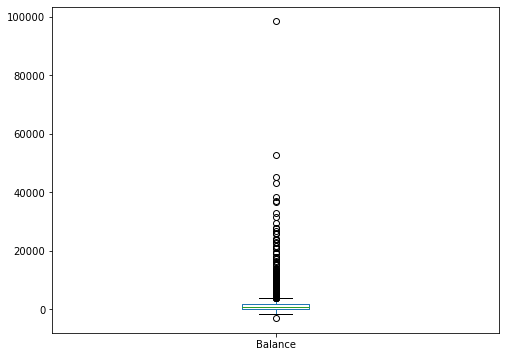

In [39]:
df[['Balance']].plot.box()

<AxesSubplot:>

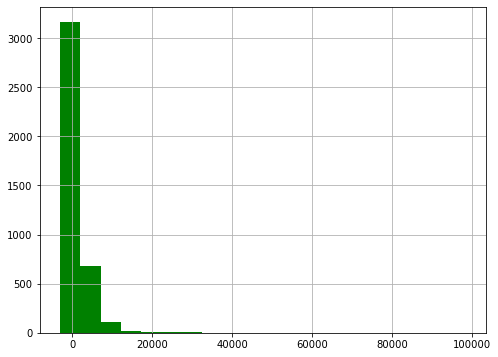

In [40]:
df['Balance'].hist(bins=20,color='g')

In [41]:
max_thresold = df['Balance'].quantile(0.95)
max_thresold

6290.849999999995

In [42]:
df[df['Balance']>max_thresold]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration
17,46,management,married,tertiary,0,7331,0,0,cellular,11,sep,4,95,2,other,1,658.0
21,80,retired,married,secondary,0,8304,0,0,telephone,8,sep,3,91,13,success,1,606.0
31,32,admin.,single,secondary,0,6981,1,0,cellular,2,jun,1,194,3,failure,0,154.0
61,39,entrepreneur,married,secondary,0,11887,0,0,cellular,18,nov,2,-1,0,failure,1,1181.0
78,34,management,single,tertiary,0,11350,1,0,cellular,15,may,1,176,1,failure,0,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,46,management,married,secondary,0,12186,0,0,cellular,20,jun,3,-1,0,failure,0,29.0
3899,45,management,married,tertiary,0,31472,0,0,cellular,19,jul,7,-1,0,failure,1,568.0
3905,55,technician,married,secondary,0,10185,0,0,cellular,11,aug,1,180,4,success,0,248.0
3953,49,admin.,married,secondary,0,10250,1,0,telephone,24,oct,1,-1,0,failure,1,97.0


In [43]:
min_thresold = df['Balance'].quantile(0.1)
min_thresold

0.0

In [44]:
df[df['Balance']<min_thresold]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration
11,53,blue-collar,married,primary,1,-462,0,0,cellular,29,jan,1,-1,0,failure,1,470.0
28,34,services,married,secondary,0,-62,1,0,cellular,16,jun,3,-1,0,failure,0,109.0
63,60,services,married,secondary,0,-46,0,0,cellular,23,may,2,-1,0,failure,0,132.0
86,40,blue-collar,married,secondary,1,-94,1,1,cellular,7,may,1,-1,0,failure,0,227.0
91,33,blue-collar,single,secondary,0,-147,1,0,cellular,30,may,2,-1,0,failure,0,652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,29,services,divorced,secondary,0,-7,1,0,cellular,13,may,3,-1,0,failure,1,1279.0
3941,27,blue-collar,single,secondary,1,-3,1,0,cellular,19,may,5,-1,0,failure,0,265.0
3945,30,entrepreneur,single,tertiary,0,-63,1,0,cellular,3,jun,1,-1,0,failure,0,94.0
3960,34,admin.,divorced,secondary,0,-251,0,0,cellular,18,jul,1,-1,0,failure,1,641.0


In [45]:
df1= df[(df['Balance']<max_thresold) & (df['Balance']>min_thresold)]

<AxesSubplot:>

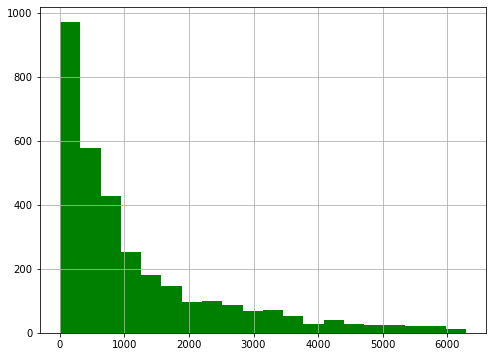

In [46]:
df1['Balance'].hist(bins=20,color='g')

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3226 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               3226 non-null   int64  
 1   Job               3226 non-null   object 
 2   Marital           3226 non-null   object 
 3   Education         3226 non-null   object 
 4   Default           3226 non-null   int64  
 5   Balance           3226 non-null   int64  
 6   HHInsurance       3226 non-null   int64  
 7   CarLoan           3226 non-null   int64  
 8   Communication     3226 non-null   object 
 9   LastContactDay    3226 non-null   int64  
 10  LastContactMonth  3226 non-null   object 
 11  NoOfContacts      3226 non-null   int64  
 12  DaysPassed        3226 non-null   int64  
 13  PrevAttempts      3226 non-null   int64  
 14  Outcome           3226 non-null   object 
 15  CarInsurance      3226 non-null   int64  
 16  Duration          3226 non-null   float64


In [48]:
#Age

<AxesSubplot:>

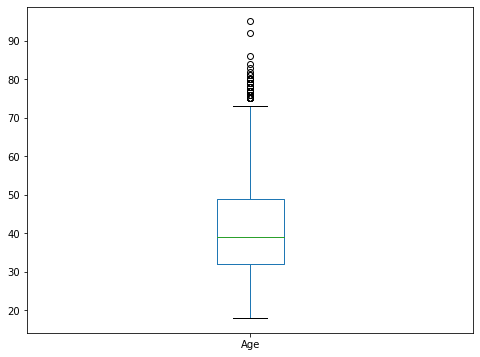

In [49]:
df1[['Age']].plot.box()

In [50]:
## data seems have age outliers, but i wont drop these Age outliers, because those age group are the significant informations for Car Insurance decision

# EDA

In [51]:
df1.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,0,70.0
1,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,0,185.0
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1,340.0
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,1,819.0
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,0,192.0


In [52]:
num_var = df._get_numeric_data().columns
num_var

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance',
       'Duration'],
      dtype='object')

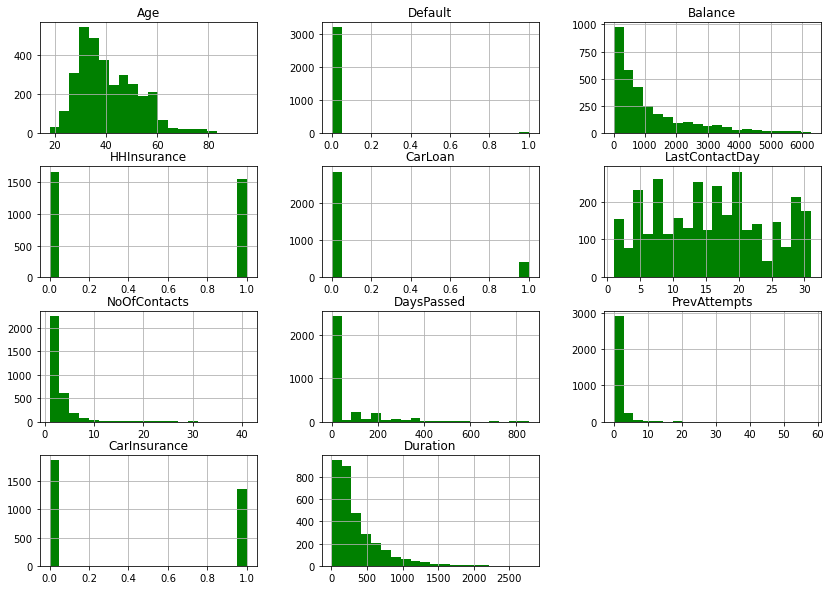

In [53]:
df1[num_var].hist(bins=20,color='g',figsize=(14,10))
plt.show()

##  CAR INSURANCE/Target (CI)

In [54]:
(pd.crosstab(index=df1['CarInsurance'],columns='count', normalize= True)*100).round(2)

col_0,count
CarInsurance,
0,57.94
1,42.06


Text(0, 0.5, '')

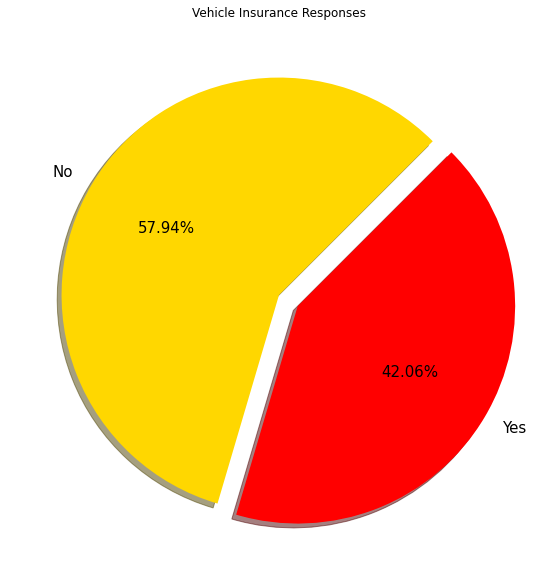

In [55]:
plt.figure(figsize=(10,10))
plt.subplot(aspect=1, title='Vehicle Insurance Responses')
colors = ["gold", "red"]
labels ="No", "Yes"
df1["CarInsurance"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',shadow=True, colors=colors, 
                                             labels=labels, fontsize=15, startangle=45)

plt.ylabel("")

    

In [56]:
## Data Target seems pretty balance with ratio 60 : 40

## Marital Status With CI

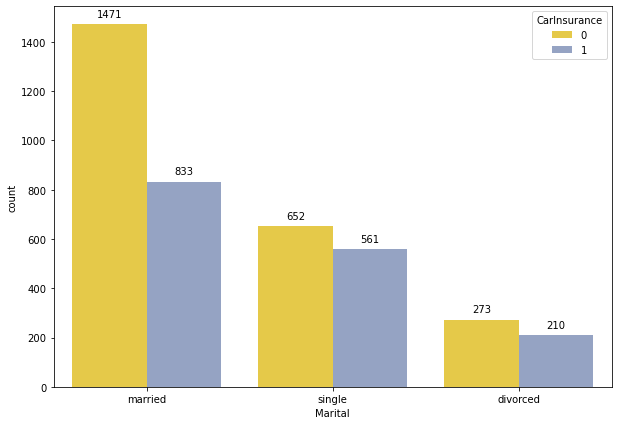

In [57]:
plt.figure(figsize=(10,7))
b= sns.countplot('Marital',hue='CarInsurance',data=df,palette= 'Set2_r',order= df1['Marital'].value_counts().index)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


- Married people are most likely to buy car insurance, but the highest ratio is single status followed by divorced.
- Probably, when single and divorced, they have a saving amounts compare to married who need more Saving


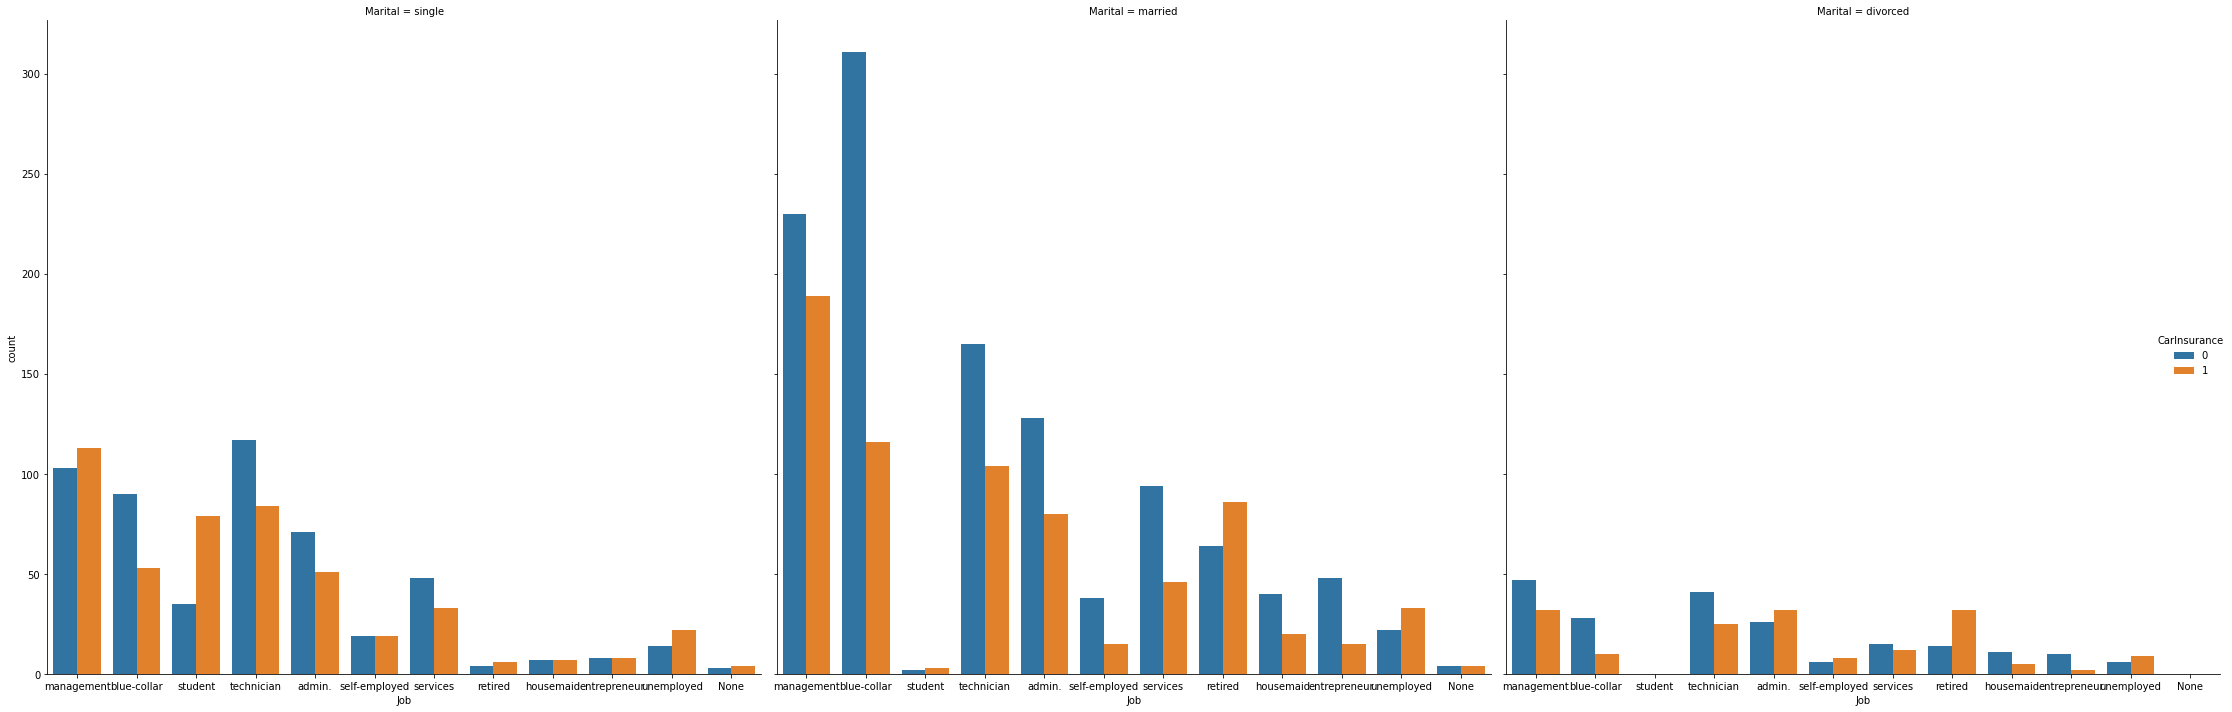

In [58]:
# plt.figure(figsize=(10,6)
sns.catplot(x="Job", hue="CarInsurance", col="Marital", data=df1, kind="count", height=10, aspect=1)
plt.tight_layout()
plt.show()

## JOB COUNT

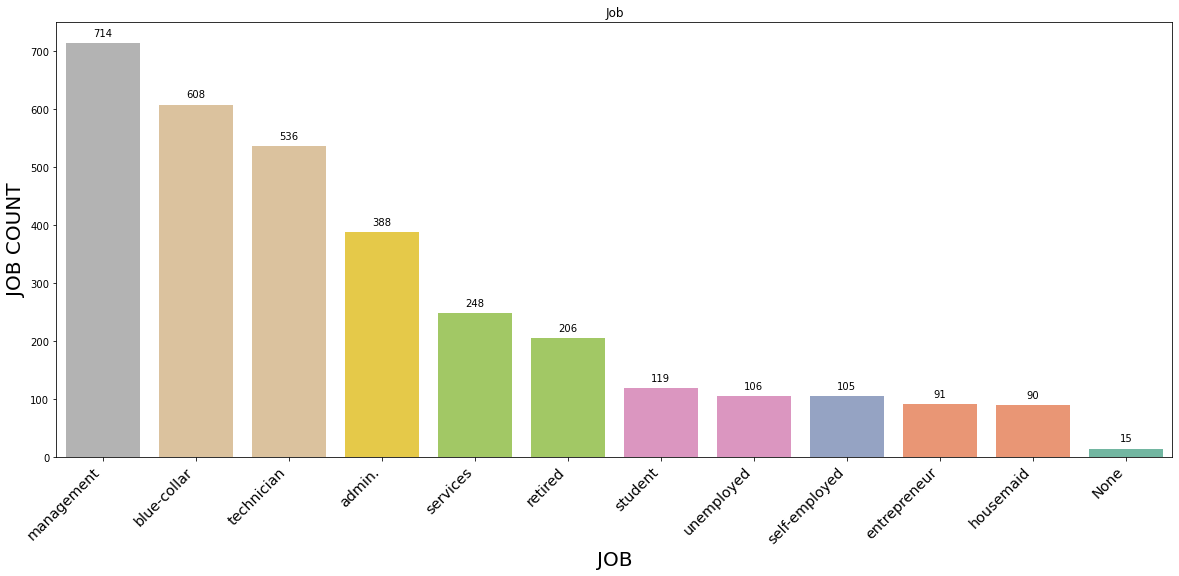

In [59]:
plt.figure(figsize=(20,8))
df1_job = df1['Job'].value_counts().nlargest(15).astype(int)
b = sns.barplot(df1_job.index, df1_job.values,palette= 'Set2_r')


plt.title('Job')
plt.xlabel('JOB',fontsize = 20)
plt.ylabel('JOB COUNT',fontsize = 20)


plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


**Management is the most frequent job**

### Job with target

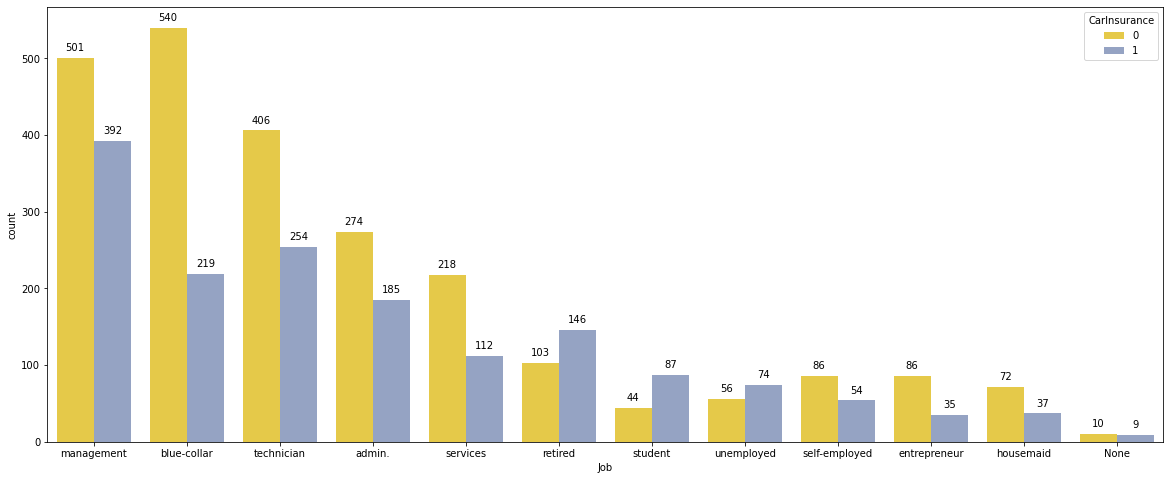

In [60]:
plt.figure(figsize=(20,8))
b= sns.countplot('Job',hue='CarInsurance',data=df,palette= 'Set2_r',order=df1['Job'].value_counts().index)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


- Student is the most frequent to buy insurance, followed by retired and unemployed

## AGE Group

In [61]:
df1['Age'].describe()

count    3226.000000
mean       41.049907
std        11.669864
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: Age, dtype: float64

<AxesSubplot:>

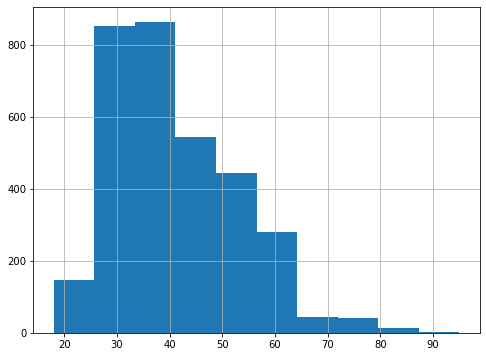

In [62]:
df1['Age'].hist()

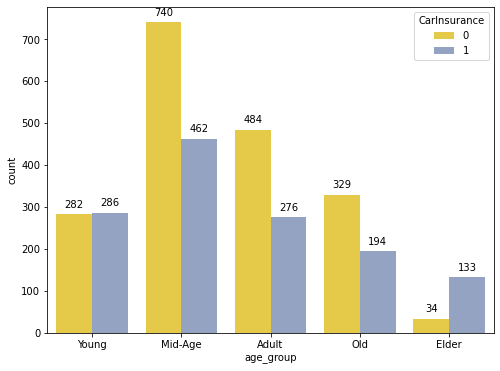

In [63]:
df1["age_group"]=pd.cut(df1.Age,bins=[18,30,40,50,60,95],labels=['Young','Mid-Age','Adult',"Old",'Elder'])
b= sns.countplot(data=df1,x="age_group",hue="CarInsurance",palette="Set2_r")

for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 



In [64]:
df1.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration,age_group
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,0,70.0,Mid-Age
1,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,0,185.0,Mid-Age
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1,340.0,Young
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,1,819.0,Young
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,0,192.0,Young


- Elder group are more likely to buy car insurances.

## EDUCATION with CI /target

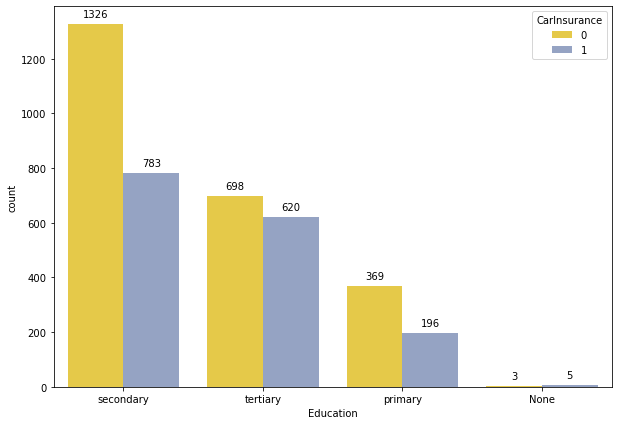

In [65]:
plt.figure(figsize=(10,7))
b= sns.countplot('Education',hue='CarInsurance',data=df,palette= 'Set2_r',order= df1['Education'].value_counts().index)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


- higher education is most likely to buy insurance
- tertiary education is the highest rate who buy insurance


## MONTH CONTACT

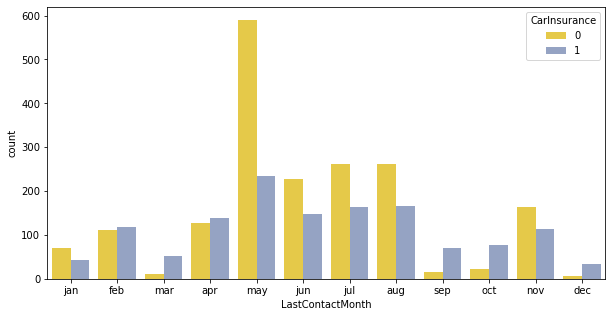

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x="LastContactMonth",hue="CarInsurance",palette="Set2_r",data=df1,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

- most distributed data is on may
- compared to months contacted, on March, September, October, and December is the highest rate to buy insurance.
- probably the previous marketing is targeting in these months period

## Way to Communicate

<AxesSubplot:xlabel='Communication', ylabel='count'>

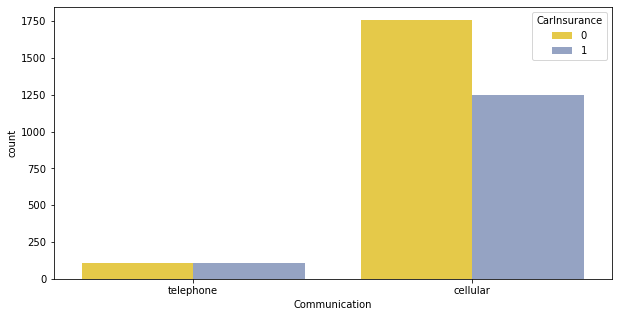

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x="Communication",hue="CarInsurance",palette="Set2_r",data=df1)

- Marketing is focusing contact the next customer by celullar instead of telephone. People these days is always using their cellphone instead of staying at home and respond to telephone call at home

## OUTCOME

<AxesSubplot:xlabel='Outcome', ylabel='count'>

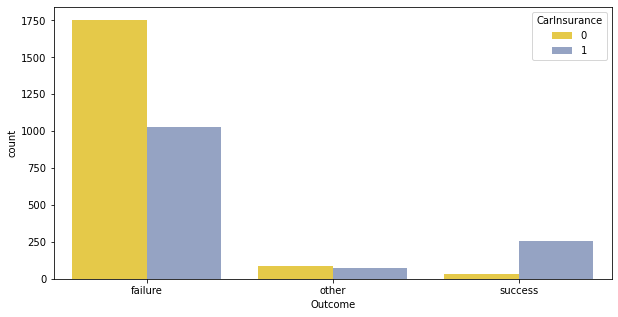

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outcome",hue="CarInsurance",palette="Set2_r",data=df1)

- the customer is most likely want to buy the insurance after the campaign

## Previous Attempts

<AxesSubplot:xlabel='PrevAttempts', ylabel='count'>

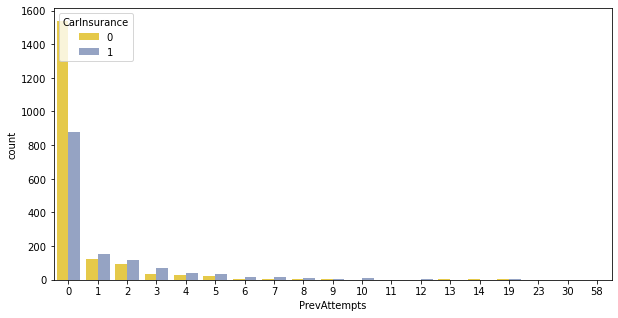

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x="PrevAttempts",hue="CarInsurance",palette="Set2_r",data=df1)

## DURATION CALL

In [70]:
avg_duration = df1['Duration'].mean()

lst = [df1]
df1["duration_status"] = np.nan

for col in lst:
    col.loc[col["Duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["Duration"] > avg_duration, "duration_status"] = "above_average"

In [71]:
df1['duration_status']

0       below_average
1       below_average
2       below_average
3       above_average
4       below_average
            ...      
3993    below_average
3994    above_average
3996    below_average
3998    below_average
3999    below_average
Name: duration_status, Length: 3226, dtype: object

In [72]:
duration_percent = pd.crosstab(df1['duration_status'], df1['CarInsurance'],normalize ='index')

In [73]:
duration_percent = pd.crosstab(df1['duration_status'], df['CarInsurance'],normalize ='index')

In [74]:
duration_percent.round(2)

CarInsurance,0,1
duration_status,,
above_average,0.28,0.72
below_average,0.73,0.27


<AxesSubplot:xlabel='duration_status'>

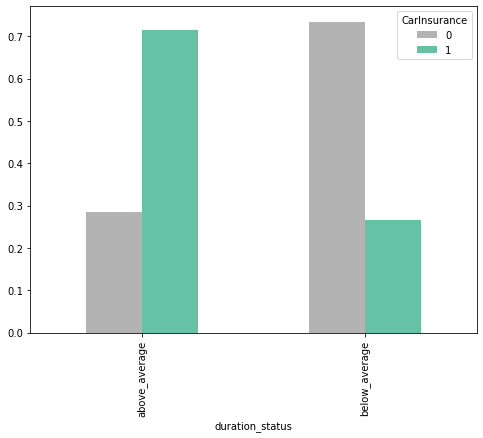

In [75]:
duration_percent.plot(kind='bar',cmap='Set2_r')

- The longer the conversations on the phone, the higher interest the customer will show to buy the insurance

## CAR LOAN

<AxesSubplot:xlabel='CarLoan', ylabel='count'>

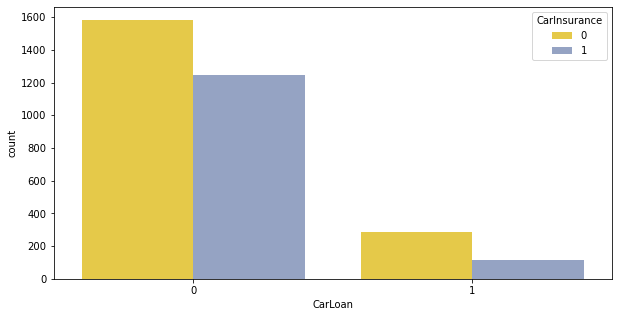

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(x="CarLoan",hue="CarInsurance",palette="Set2_r",data=df1)

# FEATURE ENGINEERING AND SELECTIONS

In [77]:
df1.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration,age_group,duration_status
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,0,70.0,Mid-Age,below_average
1,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,0,185.0,Mid-Age,below_average
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1,340.0,Young,below_average
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,1,819.0,Young,above_average
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,0,192.0,Young,below_average


<AxesSubplot:>

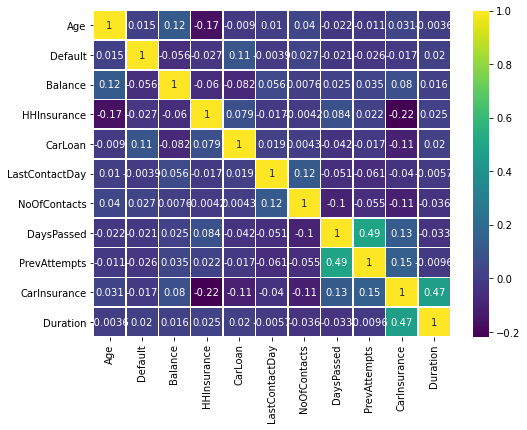

In [78]:
corr = df1.corr()
sns.heatmap(corr,cmap = 'viridis', annot= True, linewidth = 0.5)

In [79]:
num_top10_corr = df1.corr()['CarInsurance'].sort_values(ascending=False).head(20).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,CarInsurance
CarInsurance,1.000000
Duration,0.465806
PrevAttempts,0.147538
DaysPassed,0.130498
Balance,0.080168
Age,0.030690
Default,-0.017199
LastContactDay,-0.040140
CarLoan,-0.105810
NoOfContacts,-0.112737


## BINNING, ENCODING

In [80]:
df1.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration,age_group,duration_status
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,0,70.0,Mid-Age,below_average
1,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,0,185.0,Mid-Age,below_average
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1,340.0,Young,below_average
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,1,819.0,Young,above_average
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,0,192.0,Young,below_average


### BALANCE

In [81]:
df1['Balance'].describe()

count    3226.000000
mean     1166.258834
std      1305.887384
min         1.000000
25%       248.000000
50%       667.000000
75%      1610.000000
max      6290.000000
Name: Balance, dtype: float64

In [82]:
pd.cut(df1['Balance'],4).unique()

[(-5.289, 1573.25], (1573.25, 3145.5], (3145.5, 4717.75], (4717.75, 6290.0]]
Categories (4, interval[float64]): [(-5.289, 1573.25] < (1573.25, 3145.5] < (3145.5, 4717.75] < (4717.75, 6290.0]]

In [83]:
df1.loc[df1['Balance'] <= 1573.25, 'Balance'] = 0
df1.loc[(df1['Balance'] > 1573.25) & (df1['Balance'] <= 3145.5), 'Balance'] = 1
df1.loc[(df1['Balance'] > 3145.5) & (df1['Balance'] <= 4717.75), 'Balance'] = 2
df1.loc[df1['Balance'] > 4717.75 , 'Balance'] = 3

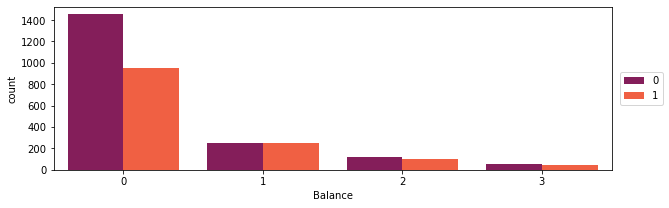

In [84]:
fig, ax = plt.subplots(figsize=(10,3))
g = sns.countplot(data=df1,x='Balance',hue='CarInsurance',palette= 'rocket',saturation= 1)
g.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=1)

### DURATION STATUS

In [85]:
df1['duration_status'] = df1['duration_status'].map({'below_average' : 0 , 'above_average' : 1})

In [86]:
df1.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration,age_group,duration_status
0,32,management,single,tertiary,0,0,1,0,telephone,28,jan,2,-1,0,failure,0,70.0,Mid-Age,0
1,32,blue-collar,married,primary,0,0,1,0,cellular,26,may,5,-1,0,failure,0,185.0,Mid-Age,0
2,29,management,single,tertiary,0,0,1,0,cellular,3,jun,1,119,1,failure,1,340.0,Young,0
3,25,student,single,primary,0,0,1,0,cellular,11,may,2,-1,0,failure,1,819.0,Young,1
4,30,management,married,tertiary,0,1,0,0,cellular,3,jun,1,-1,0,failure,0,192.0,Young,0


### AGE GROUP

In [87]:
df1['age_group'].unique()

['Mid-Age', 'Young', 'Adult', 'Elder', 'Old', NaN]
Categories (5, object): ['Young' < 'Mid-Age' < 'Adult' < 'Old' < 'Elder']

In [88]:
df1['age_group'] = df1['age_group'].map({'Young' : 0 , 'Mid-Age' : 1, 'Adult' : 2, 'Old': 3, 'Elder' : 4})

In [89]:
df1.head(20)

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration,age_group,duration_status
0,32,management,single,tertiary,0,0,1,0,telephone,28,jan,2,-1,0,failure,0,70.0,1,0
1,32,blue-collar,married,primary,0,0,1,0,cellular,26,may,5,-1,0,failure,0,185.0,1,0
2,29,management,single,tertiary,0,0,1,0,cellular,3,jun,1,119,1,failure,1,340.0,0,0
3,25,student,single,primary,0,0,1,0,cellular,11,may,2,-1,0,failure,1,819.0,0,1
4,30,management,married,tertiary,0,1,0,0,cellular,3,jun,1,-1,0,failure,0,192.0,0,0
5,32,technician,single,tertiary,0,1,0,0,cellular,22,may,1,109,1,failure,1,796.0,1,1
6,37,admin.,single,tertiary,0,0,1,0,cellular,17,mar,1,-1,0,failure,1,195.0,1,0
7,35,management,divorced,tertiary,0,0,1,0,cellular,12,may,4,-1,0,failure,0,66.0,1,0
8,30,admin.,married,secondary,0,0,1,0,cellular,18,nov,1,-1,0,failure,0,106.0,0,0
9,30,blue-collar,married,secondary,0,0,1,1,cellular,12,may,2,-1,0,failure,0,326.0,0,0


### EDUCATION

In [90]:
df.Education.unique()

array(['tertiary', 'primary', 'secondary', 'None'], dtype=object)

In [91]:
df1['Education'] = df1['Education'].map({'none' : 0 , 'secondary' : 1, 'primary' : 2, 'tertiary': 3})

In [92]:
df1.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Duration,age_group,duration_status
0,32,management,single,3.0,0,0,1,0,telephone,28,jan,2,-1,0,failure,0,70.0,1,0
1,32,blue-collar,married,2.0,0,0,1,0,cellular,26,may,5,-1,0,failure,0,185.0,1,0
2,29,management,single,3.0,0,0,1,0,cellular,3,jun,1,119,1,failure,1,340.0,0,0
3,25,student,single,2.0,0,0,1,0,cellular,11,may,2,-1,0,failure,1,819.0,0,1
4,30,management,married,3.0,0,1,0,0,cellular,3,jun,1,-1,0,failure,0,192.0,0,0


### MARITAL

In [93]:
df1.Marital.unique()

array(['single', 'married', 'divorced'], dtype=object)

In [94]:
df1['Marital'] = df1['Marital'].map({'single' : 0 , 'married' : 1, 'divorced' : 2})

### COMMUNICATION

In [95]:
df1.Communication.unique()

array(['telephone', 'cellular'], dtype=object)

In [96]:
df1['Communication'] = df1['Communication'].map({'telephone' : 0 , 'cellular' : 1})

In [97]:
df1['Communication'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3993    False
3994    False
3996    False
3998    False
3999    False
Name: Communication, Length: 3226, dtype: bool

### OUTCOME

In [98]:
df1.Outcome.unique()

array(['failure', 'other', 'success'], dtype=object)

In [99]:
df1['Outcome'] = df1['Outcome'].map({'failure' : 0 , 'success' : 1,'other': 2})

### Month

In [108]:
df1.LastContactMonth.unique()

array(['jan', 'may', 'jun', 'mar', 'nov', 'jul', 'aug', 'apr', 'feb',
       'oct', 'sep', 'dec'], dtype=object)

In [109]:
df1['Month'] = df1['LastContactMonth'].map({'jan': 1, 'feb':2, 'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [111]:
df1.Month

0       1
1       5
2       6
3       5
4       6
       ..
3993    7
3994    5
3996    7
3998    1
3999    5
Name: Month, Length: 3226, dtype: int64

## ONE HOT ENCODING

In [103]:
df1 = pd.get_dummies(data = df1,columns=['Job'])

In [105]:
df1.head()

,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,...,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
0,32,0,3.0,0,0,1,0,0,28,jan,...,0,0,0,1,0,0,0,0,0,0
1,32,1,2.0,0,0,1,0,1,26,may,...,1,0,0,0,0,0,0,0,0,0
2,29,0,3.0,0,0,1,0,1,3,jun,...,0,0,0,1,0,0,0,0,0,0
3,25,0,2.0,0,0,1,0,1,11,may,...,0,0,0,0,0,0,0,1,0,0
4,30,1,3.0,0,1,0,0,1,3,jun,...,0,0,0,1,0,0,0,0,0,0


In [113]:
df1.drop(['Age','LastContactDay','LastContactMonth','LastContactDay'],axis=1,inplace=True)

In [119]:
df1.drop('DaysPassed',axis=1,inplace=True)

In [120]:
df1.head()

,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,NoOfContacts,PrevAttempts,Outcome,...,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
0,0,3.0,0,0,1,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,2.0,0,0,1,0,1,5,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,3.0,0,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,2.0,0,0,1,0,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,3.0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# BASE MODEL

In [121]:
df2 = df1.copy()

In [122]:
df2.to_csv(r'insurance_clean.csv')